In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from matplotlib import pyplot as plt

In [4]:
KHMH = pd.read_hdf('../Data/2M_database.h5', 'data')

In [5]:
KHMH

X         Y         Z       eps       Phi        Pi       Du2  \
0        2.084914  0.773263  5.371467  0.389123  5.929454  2.571065  0.175050   
1        3.579207  5.273087  6.127028  0.449986 -0.020800  0.166264  0.046167   
2        3.388187  1.172991  5.622744  1.896762  0.122990  0.409731  0.154112   
3        0.411037  2.976801  1.318916  0.733153 -0.100582  0.678531  0.079246   
4        5.838522  4.761231  4.581595  0.913264  0.089100 -0.038596  0.056987   
...           ...       ...       ...       ...       ...       ...       ...   
1999995  2.522697  5.926789  3.377267  0.147888  0.071709  0.005710  0.015332   
1999996  2.577615  3.998488  3.958704  0.088258  0.285954  0.059784  0.031850   
1999997  4.286625  5.367916  6.030736  2.705333  9.382329  3.491056  0.270244   
1999998  2.209532  1.590026  5.420344  0.061206  0.119439  0.074447  0.023643   
1999999  1.195709  4.954430  0.098800  0.847197  0.494413  0.714668  0.064511   

            Tau11     Tau22     Tau33  ...     Tau23      du/dx      dv/dx  \
0        0.022989  0.093370  0.038283  ... -0.028837 -17.280836 -53.255463   
1        0.044917  0.014251  0.026947  ...  0.003575 -16.545313  -3.583632   
2        0.064130  0.066804  0.095864  ...  0.037747   9.503320  17.879150   
3        0.050861  0.022390  0.042795  ... -0.012291  -8.564589   5.252250   
4        0.031004  0.035333  0.024582  ... -0.016735   1.520703  21.408113   
...           ...       ...       ...  ...       ...        ...        ...   
1999995  0.004044  0.009118  0.007384  ... -0.000988  -2.193431  10.281894   
1999996  0.003476  0.021243  0.004082  ... -0.004263  -1.994280  19.125393   
1999997  0.081339  0.147939  0.087577  ...  0.059770  -5.642016  33.225952   
1999998  0.011671  0.002922  0.010468  ...  0.002239   6.801626  -1.255613   
1999999  0.024298  0.045781  0.035999  ... -0.024813  -1.335505 -23.011467   

             dw/dx      du/dy      dv/dy      dw/dy      du/dz      dv/dz  \
0        18.944334  -6.890178  -9.475703   7.551136   9.350244   3.760931   
1       -11.532818  10.915569   1.897098   3.232447  15.387520  -1.711715   
2        15.480505  -9.440991   9.255726  23.160288  -1.549383  -4.683509   
3        13.244438  -3.861566   7.529053 -10.758547 -22.631979  11.468238   
4        -8.092536  10.124756  -1.053511  -3.621481  20.054747   5.836771   
...            ...        ...        ...        ...        ...        ...   
1999995  -5.443811  10.449979  -0.396065   4.168344  -0.797098  -4.780619   
1999996   0.863560  -0.983588  -8.533388  -1.866143  -4.263985 -15.102911   
1999997  35.025429  10.333262  14.439079 -25.408459  21.311705 -47.453999   
1999998  -5.275421  11.474957   0.178159 -12.741970   8.602506  -6.042937   
1999999  10.747364  20.710165  -8.801485  18.334116   1.165909   1.853036   

             dw/dz  
0        26.755972  
1        14.648951  
2       -18.759047  
3         1.034717  
4        -0.469607  
...            ...  
1999995   2.589984  
1999996  10.527617  
1999997  -8.787678  
1999998  -6.980126  
1999999  10.139668  

[2000000 rows x 22 columns]

In [6]:
# Specify variables
Cascade_phi = np.array(KHMH['Phi'].tolist())
Cascade_pi  = np.array(KHMH['Pi'].tolist())
k_sf        = np.array(KHMH['Du2'].tolist())
k_sgs       = 0.5*(np.array(KHMH['Tau11'].tolist()) + np.array(KHMH['Tau22'].tolist()) + np.array(KHMH['Tau33'].tolist()))
Eps         = 1.3668 
dx          = 2*np.pi/8192
R           = 15*dx #radius

In [7]:
# Normalization
Cascade_phi = Cascade_phi/Eps
Cascade_pi  = Cascade_pi/Eps
k_sgs = k_sgs / ((Eps*30*dx)**(2/3))
k_sf  = k_sf  / ((Eps*30*dx)**(2/3))

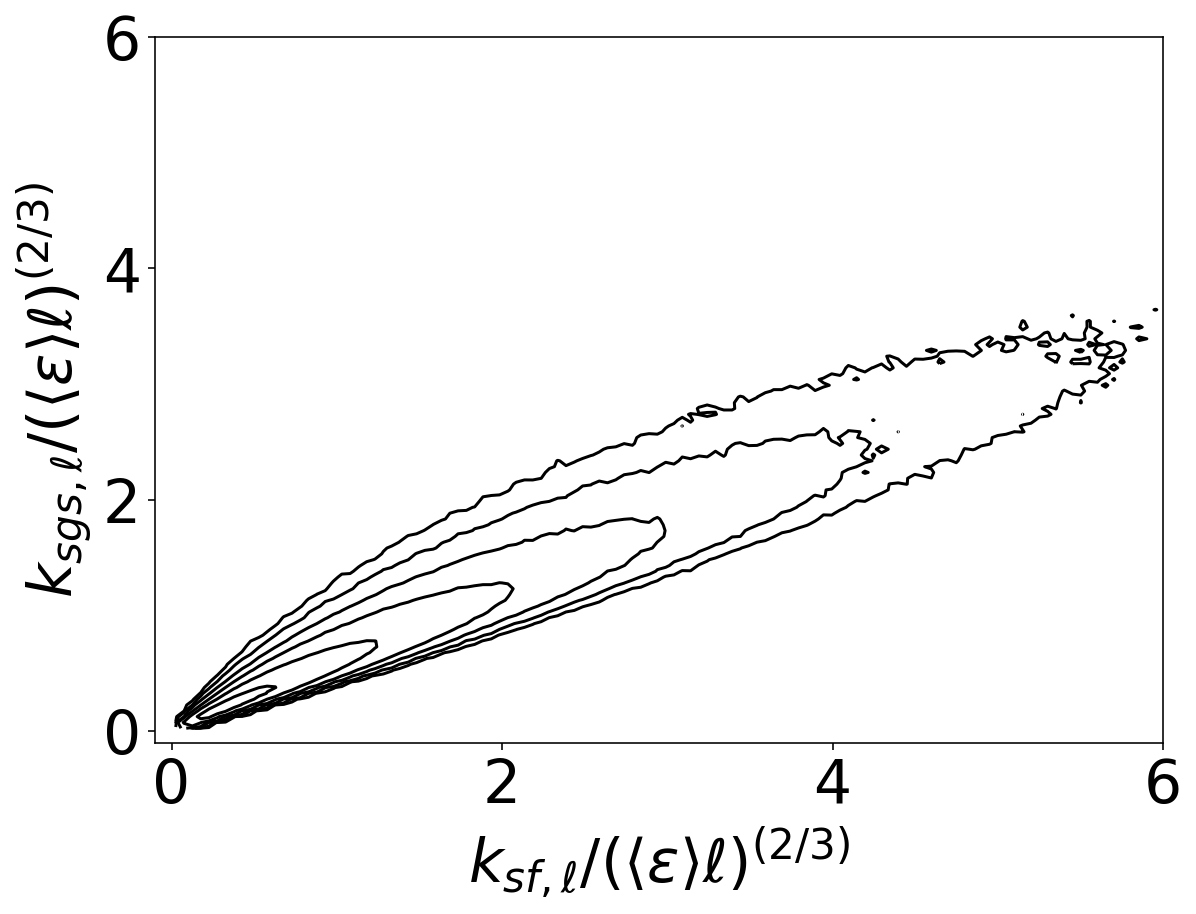

In [8]:
# Joint PDFs of Ksgs and Ksf
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
h, ex, ey = np.histogram2d(k_sf, k_sgs,
                           bins=(np.linspace(0, 10, 200), np.linspace(0, 10, 200)), normed=True)
eex =(ex[1:]+ex[:-1])/2
eey =(ey[1:]+ey[:-1])/2

plt.contour(eex, eey, h.T, np.r_[0.01, 0.03, 0.1, 0.3, 1, 3], colors='k')

plt.ylim([-0.1,6])
plt.xlim([-0.1,6])


plt.ylabel(r'$k_{sgs,\ell} / (\langle \epsilon \rangle \ell)^{(2/3)} $', fontsize = 30)
plt.xlabel(r'$k_{sf,\ell} / (\langle \epsilon \rangle \ell)^{(2/3)}$', fontsize = 30)

ax.tick_params(axis='both', which='major', labelsize=30)

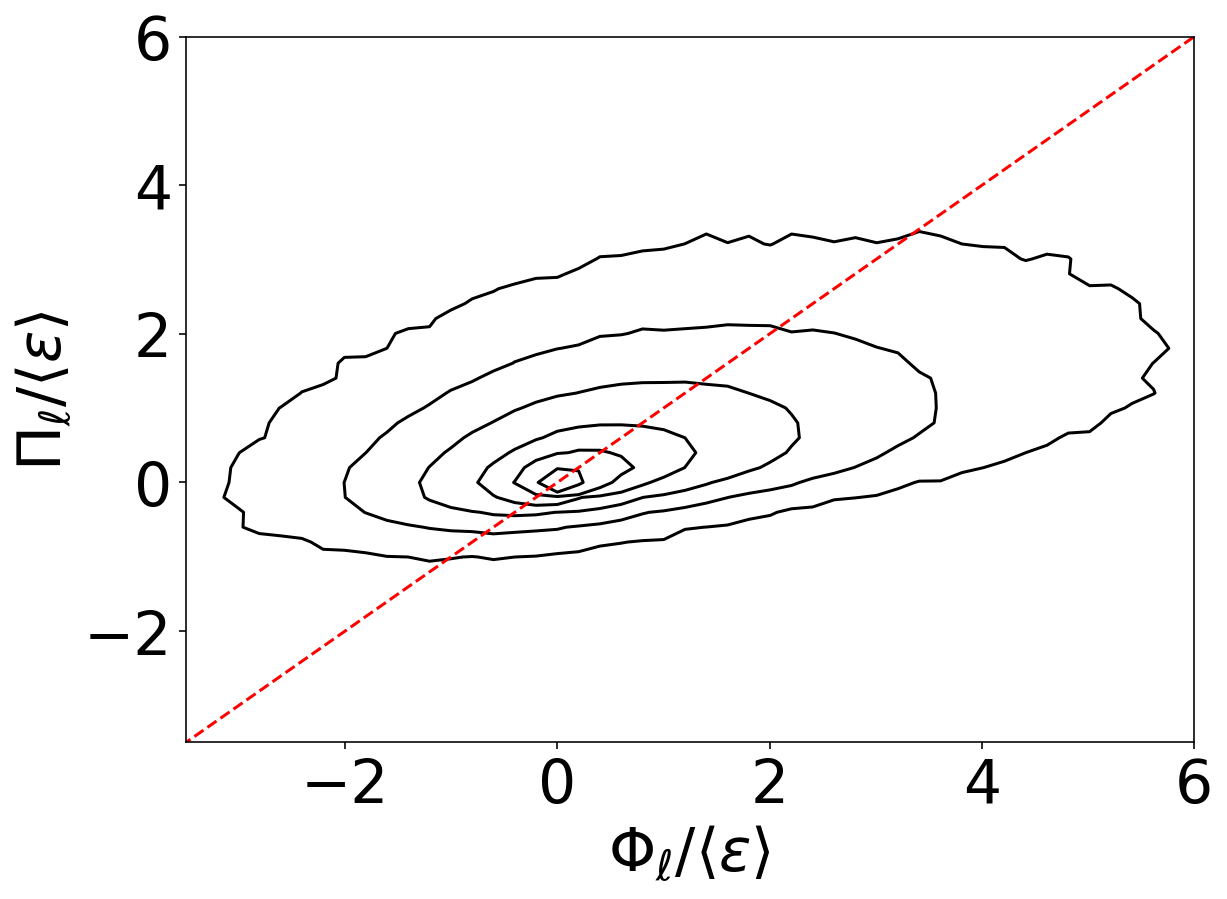

In [9]:
# Joint PDFs of Pi and Phi
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
h, ex, ey = np.histogram2d(Cascade_phi, Cascade_pi,
                           bins=(np.linspace(-30, 30, 300), np.linspace(-30, 30, 300)), density = True)
eex =(ex[1:]+ex[:-1])/2
eey =(ey[1:]+ey[:-1])/2
plt.contour(eex, eey, h.T, np.r_[ 0.003, 0.01, 0.03, 0.1, 0.3, 1], colors='k')

plt.plot(eex,eex,'--r')
plt.ylim([-3.5,6])
plt.xlim([-3.5,6])

plt.ylabel(r'$\Pi_{\ell}/\langle \epsilon \rangle$', fontsize = 30)
plt.xlabel(r'$\Phi_{\ell}/\langle \epsilon \rangle$', fontsize = 30)

ax.tick_params(axis='both', which='major', labelsize=30)